In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [60]:
house_data=pd.read_csv('data/train.csv')

In [61]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
house_data.shape


(1460, 81)

In [63]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [64]:
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [65]:
house_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

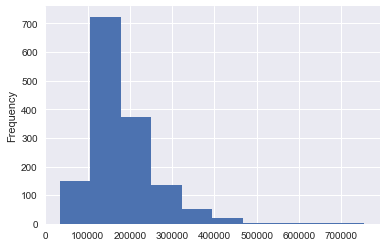

In [66]:
house_data.SalePrice.plot(kind='hist')


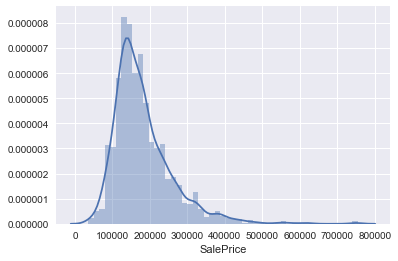

In [67]:
sns.distplot(house_data.SalePrice)

In [68]:
print("skewness: %f" %house_data['SalePrice'].skew())

print("Kurtosis: %d" %house_data['SalePrice'].kurt())

skewness: 1.882876
Kurtosis: 6


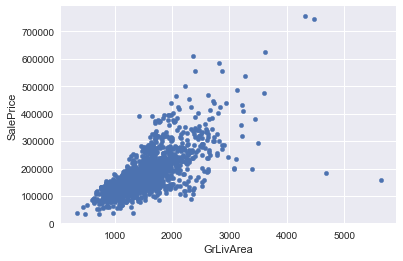

In [69]:
house_data.plot.scatter(x='GrLivArea',y='SalePrice')

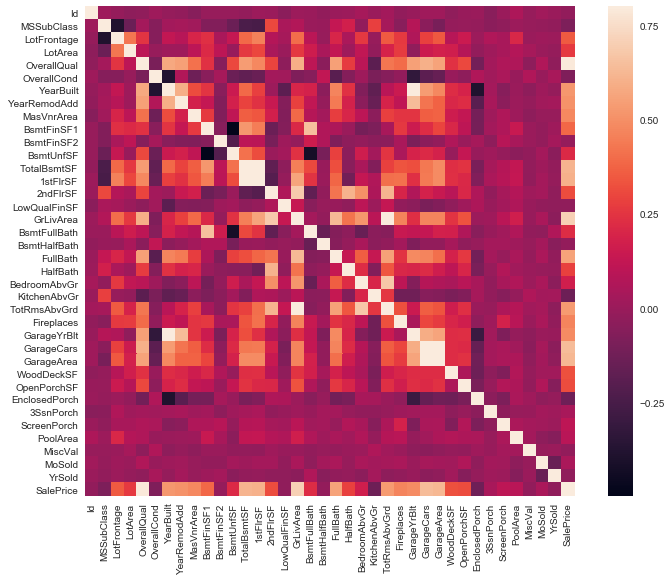

In [70]:
corrmat=house_data.corr()
f,ax=plt.subplots(figsize=(12,9))

sns.heatmap(corrmat,vmax=.8,square=True)

<function matplotlib.pyplot.show(*args, **kw)>

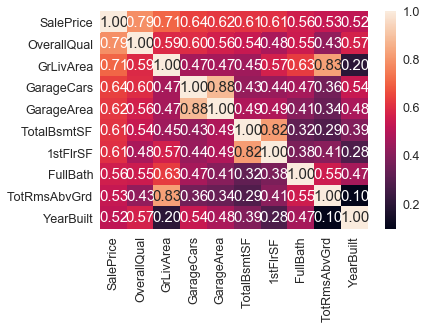

In [71]:
k=10
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(house_data[cols].values.T)

sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True,annot=True,fmt='.2f',yticklabels=cols.values,xticklabels=cols.values)
plt.show

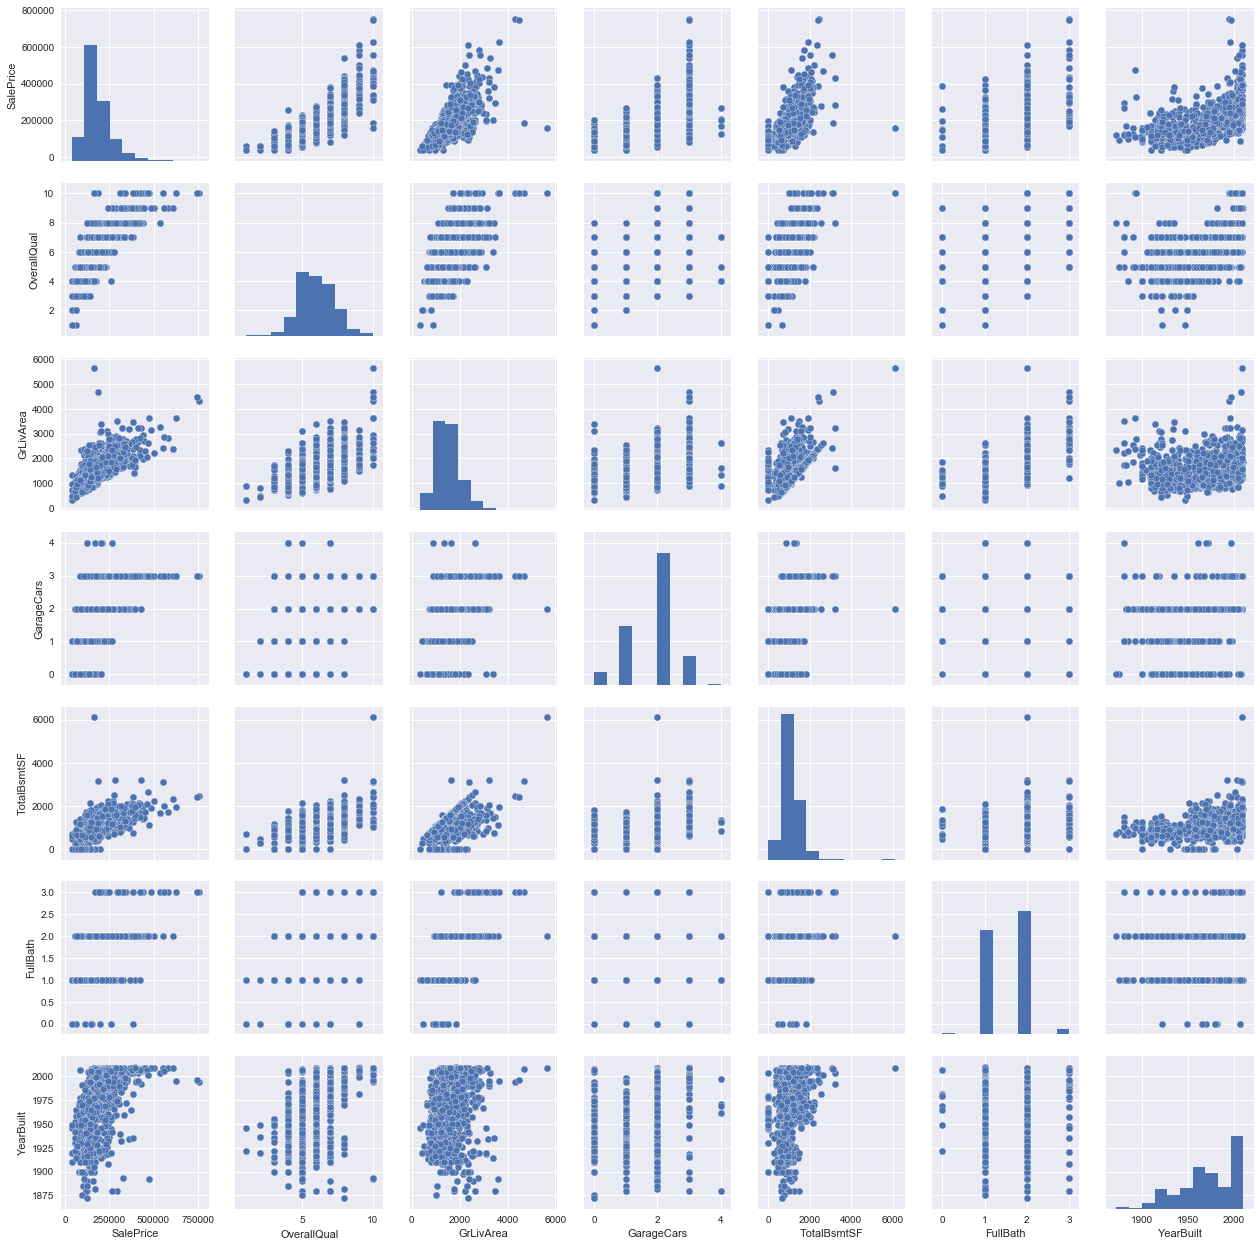

In [72]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_data[cols],size=2.5)
plt.show()

In [73]:
null_values=house_data.isnull().sum().sort_values(ascending=False)
percent=(house_data.isnull().sum()/house_data.isnull().count()).sort_values(ascending=False)


missing_data=pd.concat([null_values,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [74]:
house_data = house_data.drop((missing_data[missing_data['Total'] > 1]).index,1)
house_data = house_data.drop(house_data.loc[house_data['Electrical'].isnull()].index)
house_data.isnull().sum().max() #just checking that there's no missing data missing..

0

In [75]:
house_data.isnull().sum().max()

0

In [76]:
#Outliers

In [77]:
saleprice_scaled = StandardScaler().fit_transform(house_data['SalePrice'][:,np.newaxis]);

low_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]

high_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print("Low distribution")
print(low_range)

print("High Distribution")
print(high_range)

Low distribution
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
High Distribution
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


How 'SalePrice' looks with her new clothes:

Low range values are similar and not too far from 0.
High range values are far from 0 and the 7.something values are really out of range.

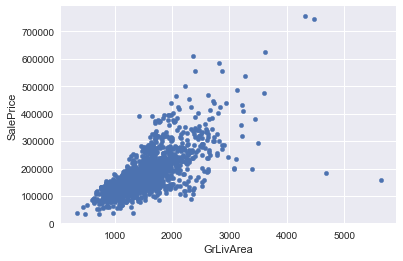

In [78]:
house_data.plot.scatter(x='GrLivArea',y='SalePrice')

In [79]:
house_data.sort_values(by='GrLivArea',ascending=False)[:2]

house_data=house_data.drop(house_data[house_data['Id']==1299].index)

house_data=house_data.drop(house_data[house_data['Id']==524].index)

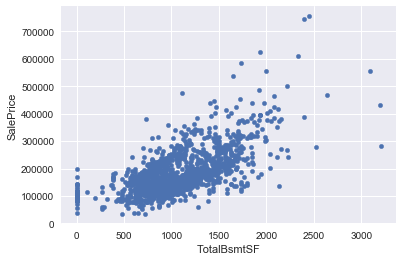

In [80]:
house_data.plot.scatter(x='TotalBsmtSF',y='SalePrice')

In [81]:
#Hardcode
# Normality
#Homoscedasticity
#Linearity
#Absence of Correlatted errors

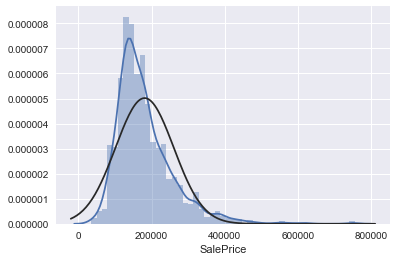

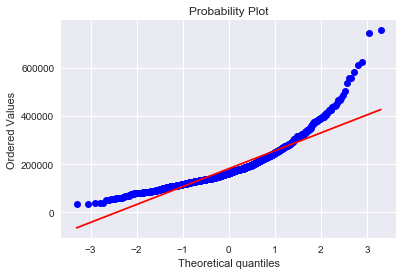

In [82]:
sns.distplot(house_data['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(house_data['SalePrice'],plot=plt)

In [83]:
house_data['SalePrice']=np.log(house_data['SalePrice'])


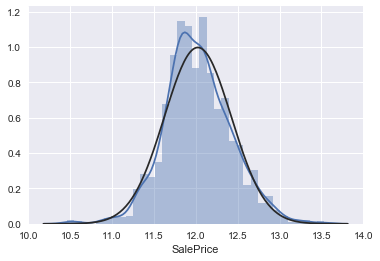

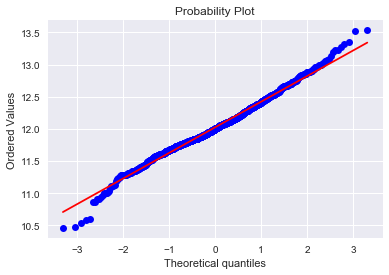

In [84]:
sns.distplot(house_data['SalePrice'], fit=norm)
fig=plt.show()
res=stats.probplot(house_data['SalePrice'],plot=plt)

In [85]:
print("skewness: %f" %house_data['SalePrice'].skew())

skewness: 0.121551


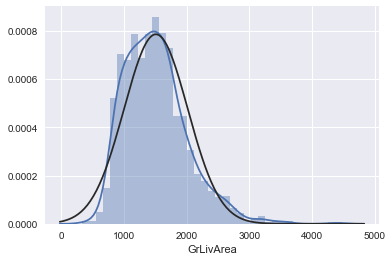

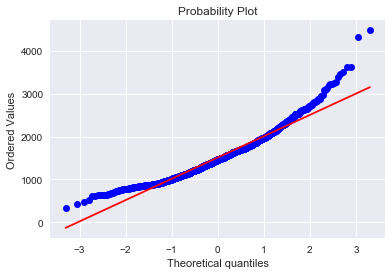

In [86]:
sns.distplot(house_data['GrLivArea'],fit=norm);
fig=plt.show()

res=stats.probplot(house_data['GrLivArea'],plot=plt)

In [87]:
house_data['GrLivArea']=np.log(house_data['GrLivArea'])

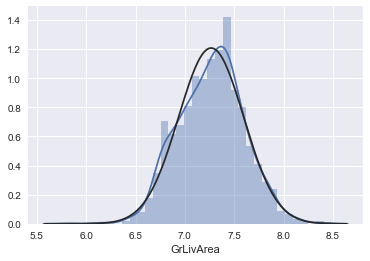

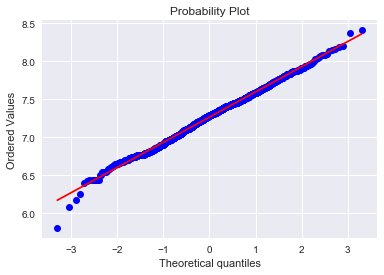

In [88]:
sns.distplot(house_data['GrLivArea'],fit=norm)
plt.show()
res=stats.probplot(house_data['GrLivArea'],plot=plt)

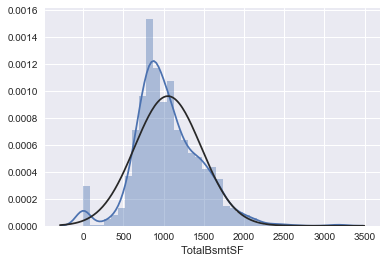

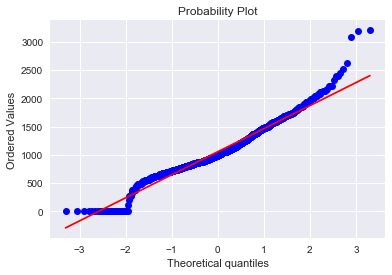

In [89]:
sns.distplot(house_data['TotalBsmtSF'],fit=norm)
plt.show()
res=stats.probplot(house_data['TotalBsmtSF'],plot=plt)

In [90]:
house_data['HasBsmt']=pd.Series(len(house_data['TotalBsmtSF']),index=house_data.index)

In [91]:
house_data['HasBsmt']=0
house_data.loc[house_data['TotalBsmtSF']>0,'HasBsmt']=1

In [92]:
house_data.loc[house_data['HasBsmt']==1,'TotalBsmtSF']=np.log(house_data['TotalBsmtSF'])

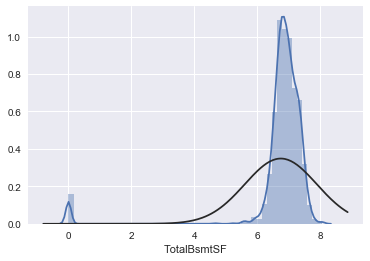

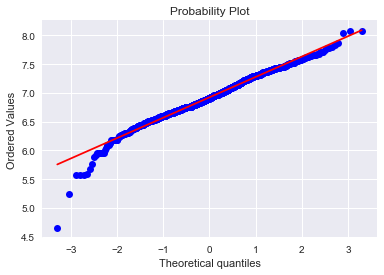

In [93]:
sns.distplot(house_data['TotalBsmtSF'],fit=norm)
plt.show()
res=stats.probplot(house_data[house_data['TotalBsmtSF']>0]['TotalBsmtSF'],plot=plt)

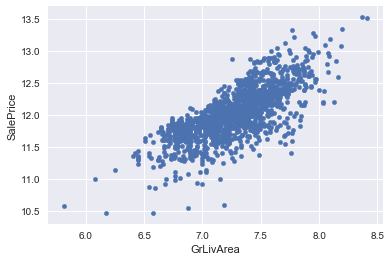

In [94]:
house_data.plot.scatter(x='GrLivArea',y='SalePrice')

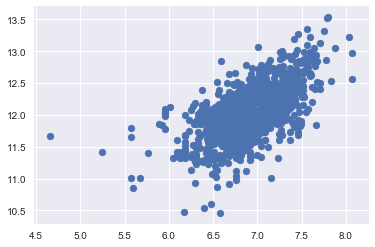

In [95]:
plt.scatter(house_data[house_data['TotalBsmtSF']>0]['TotalBsmtSF'], house_data[house_data['TotalBsmtSF']>0]['SalePrice']);

In [96]:
features=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']

In [97]:
train=house_data[features]

In [98]:
train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt
0,12.247694,7,7.444249,2,6.752270,2,8,2003
1,12.109011,6,7.140453,2,7.140453,2,6,1976
2,12.317167,7,7.487734,2,6.824374,2,6,2001
3,11.849398,7,7.448334,3,6.628041,1,7,1915
4,12.429216,8,7.695303,3,7.043160,2,9,2000


In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 8 columns):
SalePrice       1457 non-null float64
OverallQual     1457 non-null int64
GrLivArea       1457 non-null float64
GarageCars      1457 non-null int64
TotalBsmtSF     1457 non-null float64
FullBath        1457 non-null int64
TotRmsAbvGrd    1457 non-null int64
YearBuilt       1457 non-null int64
dtypes: float64(3), int64(5)
memory usage: 142.4 KB


In [49]:
train['SalePrice']=train.SalePrice.astype(int)
train['GrLivArea']=train.GrLivArea.astype(int)
train['TotalBsmtSF']=train.TotalBsmtSF.astype(int)

In [101]:
x = train.drop(['DEFAULTER'],axis = 1)
y = train.SalePrice

# rescale the metrics to the same mean and standard deviation
scaler = preprocessing.StandardScaler()
x = scaler.fit(x).transform(x)

# Further divide the train data into train test split 70% & 30% respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=2)

In [102]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [103]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [104]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
reg.score(x_test,y_test)

1.0